In [1]:
import pandas as pd
import numpy as np
from arctic import Arctic
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import pandas as pd

In [2]:
store = Arctic('localhost',27017)

# Create the library - defaults to VersionStore
store.initialize_library('NASDAQ')

# Access the library
library = store['NASDAQ']



Library created, but couldn't enable sharding: no such command: 'enablesharding'. This is OK if you're not 'admin'


In [8]:
access_token = "baddfdfbbc5590fca2c248e4582f4b2a-c8632d39abd3e0b8b28002eb54e1598e"

client = oandapyV20.API(access_token=access_token)

params ={"count": 5000,"granularity": "M5"}


In [9]:
r = instruments.InstrumentsCandles(instrument="DE30_EUR",params=params)
client.request(r)

{'instrument': 'DE30_EUR',
 'granularity': 'M5',
 'candles': [{'complete': True,
   'volume': 1424,
   'time': '2019-10-08T10:00:00.000000000Z',
   'mid': {'o': '12010.3', 'h': '12011.8', 'l': '11984.3', 'c': '11989.2'}},
  {'complete': True,
   'volume': 1801,
   'time': '2019-10-08T10:05:00.000000000Z',
   'mid': {'o': '11989.0', 'h': '11992.0', 'l': '11966.2', 'c': '11967.6'}},
  {'complete': True,
   'volume': 1540,
   'time': '2019-10-08T10:10:00.000000000Z',
   'mid': {'o': '11967.2', 'h': '11985.6', 'l': '11966.0', 'c': '11977.0'}},
  {'complete': True,
   'volume': 1359,
   'time': '2019-10-08T10:15:00.000000000Z',
   'mid': {'o': '11976.5', 'h': '11982.2', 'l': '11970.5', 'c': '11971.5'}},
  {'complete': True,
   'volume': 1483,
   'time': '2019-10-08T10:20:00.000000000Z',
   'mid': {'o': '11971.8', 'h': '11981.0', 'l': '11962.6', 'c': '11978.6'}},
  {'complete': True,
   'volume': 1005,
   'time': '2019-10-08T10:25:00.000000000Z',
   'mid': {'o': '11978.8', 'h': '11985.6', 'l

In [10]:
out=[]
out=pd.DataFrame(r.response['candles'])
df=pd.DataFrame(out)
print(df['mid'])

0       {'o': '12010.3', 'h': '12011.8', 'l': '11984.3...
1       {'o': '11989.0', 'h': '11992.0', 'l': '11966.2...
2       {'o': '11967.2', 'h': '11985.6', 'l': '11966.0...
3       {'o': '11976.5', 'h': '11982.2', 'l': '11970.5...
4       {'o': '11971.8', 'h': '11981.0', 'l': '11962.6...
                              ...                        
4995    {'o': '13177.8', 'h': '13178.8', 'l': '13175.5...
4996    {'o': '13177.3', 'h': '13181.8', 'l': '13175.8...
4997    {'o': '13176.8', 'h': '13177.8', 'l': '13173.8...
4998    {'o': '13173.6', 'h': '13175.0', 'l': '13168.6...
4999    {'o': '13174.5', 'h': '13176.8', 'l': '13171.2...
Name: mid, Length: 5000, dtype: object


In [11]:
objs = [df['mid'], pd.DataFrame(df['mid'].tolist()).iloc[:, :4]]
df2 = pd.concat(objs, axis=1).drop('mid', axis=1)
df2['time'] = df['time']
df2['volume'] = df['volume']
df2.columns=['Open','High','Low','Close','Timestamp','volume']

In [12]:
print(df2)

         Open     High      Low    Close                       Timestamp  \
0     12010.3  12011.8  11984.3  11989.2  2019-10-08T10:00:00.000000000Z   
1     11989.0  11992.0  11966.2  11967.6  2019-10-08T10:05:00.000000000Z   
2     11967.2  11985.6  11966.0  11977.0  2019-10-08T10:10:00.000000000Z   
3     11976.5  11982.2  11970.5  11971.5  2019-10-08T10:15:00.000000000Z   
4     11971.8  11981.0  11962.6  11978.6  2019-10-08T10:20:00.000000000Z   
...       ...      ...      ...      ...                             ...   
4995  13177.8  13178.8  13175.5  13177.5  2019-11-06T13:50:00.000000000Z   
4996  13177.3  13181.8  13175.8  13177.0  2019-11-06T13:55:00.000000000Z   
4997  13176.8  13177.8  13173.8  13173.8  2019-11-06T14:00:00.000000000Z   
4998  13173.6  13175.0  13168.6  13174.3  2019-11-06T14:05:00.000000000Z   
4999  13174.5  13176.8  13171.2  13172.0  2019-11-06T14:10:00.000000000Z   

      volume  
0       1424  
1       1801  
2       1540  
3       1359  
4       1483

In [13]:
# Load some data - maybe from Quandl
aapl = df2
# Store the data in the library
library.write('Forex', aapl, metadata={'source': 'OANDA'})


VersionedItem(symbol=Forex,library=arctic.NASDAQ,data=<class 'NoneType'>,version=1,metadata={'source': 'OANDA'},host=localhost)

In [20]:
# Reading the data
item = library.read('Forex')
print(item)


VersionedItem(symbol=Forex,library=arctic.NASDAQ,data=<class 'pandas.core.frame.DataFrame'>,version=1,metadata={'source': 'OANDA'},host=localhost)


In [21]:
aapl = item.data
print(aapl)
metadata = item.metadata

          Open     High      Low    Close                       Timestamp  \
index                                                                       
0      12010.3  12011.8  11984.3  11989.2  2019-10-08T10:00:00.000000000Z   
1      11989.0  11992.0  11966.2  11967.6  2019-10-08T10:05:00.000000000Z   
2      11967.2  11985.6  11966.0  11977.0  2019-10-08T10:10:00.000000000Z   
3      11976.5  11982.2  11970.5  11971.5  2019-10-08T10:15:00.000000000Z   
4      11971.8  11981.0  11962.6  11978.6  2019-10-08T10:20:00.000000000Z   
...        ...      ...      ...      ...                             ...   
4995   13177.8  13178.8  13175.5  13177.5  2019-11-06T13:50:00.000000000Z   
4996   13177.3  13181.8  13175.8  13177.0  2019-11-06T13:55:00.000000000Z   
4997   13176.8  13177.8  13173.8  13173.8  2019-11-06T14:00:00.000000000Z   
4998   13173.6  13175.0  13168.6  13174.3  2019-11-06T14:05:00.000000000Z   
4999   13174.5  13176.8  13171.2  13172.0  2019-11-06T14:10:00.000000000Z   

In [22]:
ohlc = []
ohlc=pd.DataFrame(aapl)
print(ohlc)

          Open     High      Low    Close                       Timestamp  \
index                                                                       
0      12010.3  12011.8  11984.3  11989.2  2019-10-08T10:00:00.000000000Z   
1      11989.0  11992.0  11966.2  11967.6  2019-10-08T10:05:00.000000000Z   
2      11967.2  11985.6  11966.0  11977.0  2019-10-08T10:10:00.000000000Z   
3      11976.5  11982.2  11970.5  11971.5  2019-10-08T10:15:00.000000000Z   
4      11971.8  11981.0  11962.6  11978.6  2019-10-08T10:20:00.000000000Z   
...        ...      ...      ...      ...                             ...   
4995   13177.8  13178.8  13175.5  13177.5  2019-11-06T13:50:00.000000000Z   
4996   13177.3  13181.8  13175.8  13177.0  2019-11-06T13:55:00.000000000Z   
4997   13176.8  13177.8  13173.8  13173.8  2019-11-06T14:00:00.000000000Z   
4998   13173.6  13175.0  13168.6  13174.3  2019-11-06T14:05:00.000000000Z   
4999   13174.5  13176.8  13171.2  13172.0  2019-11-06T14:10:00.000000000Z   

In [29]:
ohlc.describe()

,volume
count,5000.000000
mean,434.130800
std,542.160894
min,1.000000
25%,40.000000
50%,209.000000
75%,659.000000
max,5729.000000


In [31]:
import matplotlib.pyplot as plt
ohlc['Open']=ohlc['Open'].astype(float)

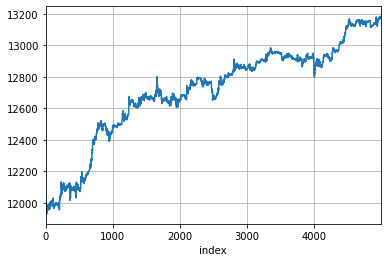

In [32]:
ohlc['Open'].plot(grid=True)
plt.show()

In [34]:
low = 50
high = 120
sign = pd.DataFrame(index=ohlc.index)

In [35]:
sign['signal'] = 0.0

In [36]:
sign['short'] = ohlc['Open'].rolling(window=low, min_periods=1,center=False).mean() 

In [37]:
sign['long'] = ohlc['Open'].rolling(window=high, min_periods=1,center=False).mean()

In [38]:
sign['signal'][low:]= np.where(sign['short'][low:]>sign['long'][low:],1.0,0.0)

In [39]:
sign.fillna(0, inplace=True)
print(sign)

       signal         short          long
index                                    
0         0.0  12010.300000  12010.300000
1         0.0  11999.650000  11999.650000
2         0.0  11988.833333  11988.833333
3         0.0  11985.750000  11985.750000
4         0.0  11982.960000  11982.960000
...       ...           ...           ...
4995      1.0  13161.014000  13148.915833
4996      1.0  13161.956000  13149.358333
4997      1.0  13163.052000  13149.810000
4998      1.0  13164.124000  13150.233333
4999      1.0  13165.208000  13150.666667

[5000 rows x 3 columns]


In [40]:
sign['positions'] = sign['signal'].diff()
sign[sign['positions'] == -1.0]

,signal,short,long,positions
index,,,,
151,0.0,11991.084,11991.337500,-1.0
364,0.0,12098.272,12098.684167,-1.0
447,0.0,12087.710,12087.985833,-1.0
879,0.0,12486.376,12486.620000,-1.0
905,0.0,12488.784,12488.927500,-1.0
1344,0.0,12628.474,12629.071667,-1.0
1543,0.0,12669.106,12669.312500,-1.0
1609,0.0,12668.128,12668.290000,-1.0
1729,0.0,12700.876,12701.070000,-1.0


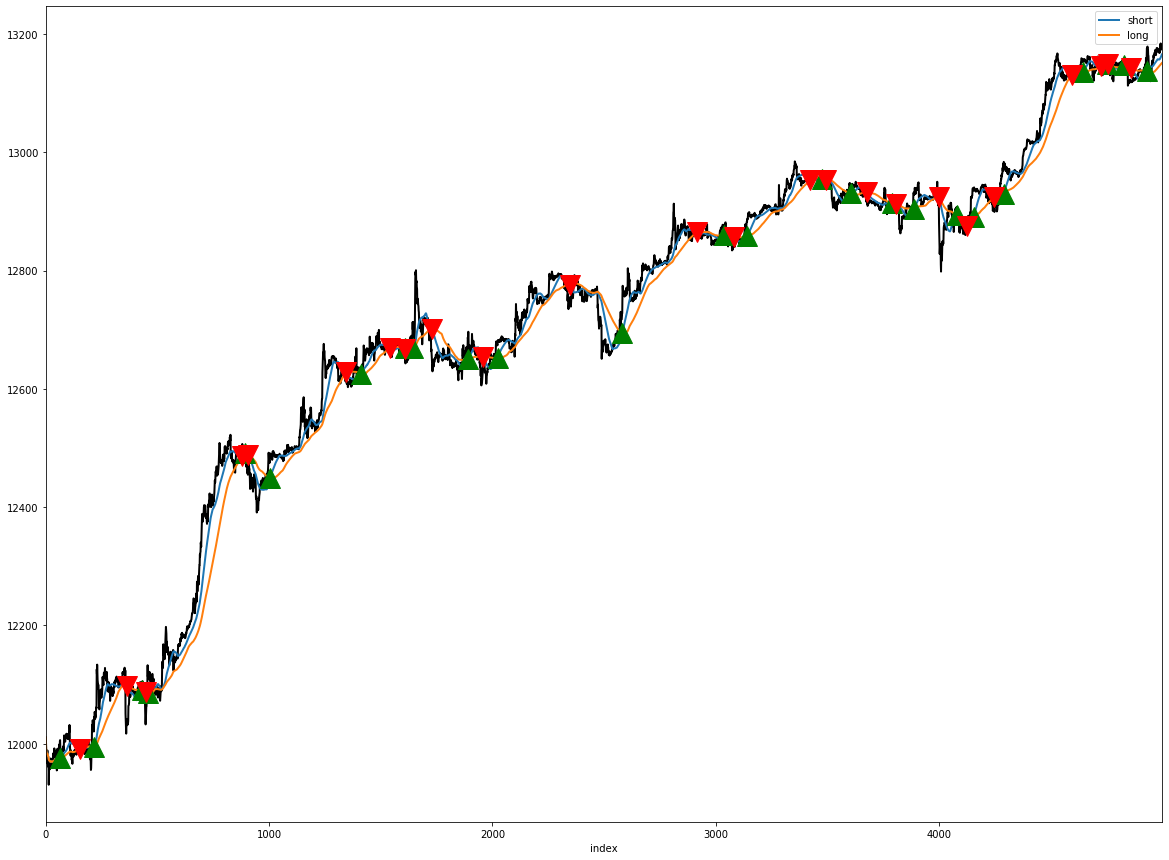

In [41]:
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(111)
ohlc['Open'].plot(ax=ax1,color='black', lw=2.)
sign[['short','long']].plot(ax=ax1, lw=2.)
ax1.plot(sign.loc[sign.positions==1.0].index,sign.short[sign.positions == 1.0],'^', markersize=20, color='g')
ax1.plot(sign.loc[sign.positions==-1.0].index,sign.short[sign.positions == -1.0],'v', markersize=20, color='r')
plt.show()
